## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [124]:
!dir zippedData

 Volume in drive C is Local Disk
 Volume Serial Number is AA17-54D9

 Directory of C:\Users\styop\Documents\Flatiron\Microsoft-Movie-Data-Analysis\zippedData

05/08/2023  02:00 PM    <DIR>          .
05/10/2023  04:16 PM    <DIR>          ..
05/05/2023  03:31 PM            53,544 bom.movie_gross.csv.gz
05/08/2023  01:59 PM       169,443,328 im.db
05/05/2023  03:31 PM           498,202 rt.movie_info.tsv.gz
05/05/2023  03:31 PM         3,402,194 rt.reviews.tsv.gz
05/05/2023  03:31 PM           827,840 tmdb.movies.csv.gz
05/05/2023  03:31 PM           153,218 tn.movie_budgets.csv.gz
               6 File(s)    174,378,326 bytes
               2 Dir(s)   6,383,960,064 bytes free


In [125]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
import pandas as pd
tn_movie_budget = pd.read_csv('\\Users\\styop\\Documents\\Flatiron\\Microsoft-Movie-Data-Analysis\\zippedData\\tn.movie_budgets.csv.gz')

In [127]:
tn_movie_budget.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [128]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [129]:
tn_movie_budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [130]:
tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].str.replace('$','').str.replace(',','')
tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].astype('float')
tn_movie_budget['worldwide_gross'].dtype



dtype('float64')

In [131]:
tn_movie_budget['production_budget']=tn_movie_budget['production_budget'].str.replace('$','').str.replace(',','')
tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].astype('float')
tn_movie_budget['production_budget'].dtype


dtype('float64')

In [132]:
tn_movie_budget['domestic_gross']=tn_movie_budget['domestic_gross'].str.replace('$','').str.replace(',','')
tn_movie_budget['domestic_gross'] = tn_movie_budget['domestic_gross'].astype('float')
tn_movie_budget['domestic_gross'].dtype


dtype('float64')

In [133]:
tn_movie_budget['worldwide_gross'].max()


2776345279.0

In [134]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [135]:
tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [136]:
tn_movie_budget['worldwide_revenue'] = (tn_movie_budget['worldwide_gross'] - tn_movie_budget['production_budget'])
tn_movie_budget['domestic_revenue'] = (tn_movie_budget['domestic_gross'] - tn_movie_budget['production_budget'])


In [137]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   worldwide_revenue  5782 non-null   float64
 7   domestic_revenue   5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB


In [138]:
tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_revenue,domestic_revenue
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0


In [139]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   worldwide_revenue  5782 non-null   float64
 7   domestic_revenue   5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB


In [140]:
tn_movie_budget['worldwide_gross'].isna().sum()

0

In [141]:
tn_movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_revenue,domestic_revenue
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,630662225.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.634204e+08,9420425.0
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,-99925825.0


In [142]:
tn_movie_budget['movie'].value_counts()

Home                        3
Halloween                   3
King Kong                   3
Pinocchio                   2
Total Recall                2
                           ..
The 13th Warrior            1
Dragon Ball Super: Broly    1
Drinking Buddies            1
Namastey London             1
Bram Stoker's Dracula       1
Name: movie, Length: 5698, dtype: int64

In [143]:
#to keep only year in release_date column
tn_movie_budget['release_date']=pd.to_datetime(tn_movie_budget['release_date']).dt.strftime('%Y') 
tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_revenue,domestic_revenue
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0


In [144]:
tn_movie_budget.groupby('release_date')

In [145]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   worldwide_revenue  5782 non-null   float64
 7   domestic_revenue   5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB


In [ ]:
#bom_movie_budget = pd.read_csv("\\Users\\styop\\Documents\\Flatiron\\Microsoft-Movie-Data-Analysis\\zippedData\\bom.movie_gross.csv.gz")
#bom_movie_budget.head(20)









In [ ]:
#studio_gross = (bom_movie_budget.groupby('studio')['domestic_gross','foreign_gross'].mean())#.apply('{:.1f}'.format)
#studio_gross.head(10)

In [ ]:
#studio_gross = bom_movie_budget.groupby('studio').agg({'title' : 'count', 'foreign_gross': 'sum', 'domestic_gross': 'sum'})
#print(studio_gross)
#studio_gross.dropna(subset = ['foreign_gross','foreign_gross'], inplace = True)
#studio_gross.head(20)

In [ ]:
#bom_movie_budget['studio'].unique()

In [ ]:
#len(bom_movie_budget['studio'].unique())

In [ ]:
#bom_movie_budget.info()

In [ ]:
#bom_movie_budget.loc[:,'foreign_gross']

In [ ]:
#bom_movie_budget['foreign_gross'] = bom_movie_budget['foreign_gross'].astype('float')
#bom_movie_budget['foreign_gross'].dtype

In [ ]:
#sns.scatterplot(  x = 'year', y = 'foreign_gross', data = bom_movie_budget)
#plt.show()

In [ ]:
#bom_movie_budget.info()

In [ ]:
#bom_movie_budget['year'].unique()

In [ ]:
#bom_movie_budget[bom_movie_budget['year'] >= 2018].head(10)

In [ ]:
# bom_movie_budget.loc[:,['title', 'year']]

In [ ]:
#rt_movie_info = pd.read_csv("\\Users\\styop\\Documents\\Flatiron\\Microsoft-Movie-Data-Analysis\\zippedData\\rt.movie_info.tsv.gz",delimiter='\t')
#rt_movie_info.head()

In [ ]:
#rt_movie_info.columns


In [ ]:
#list(rt_movie_info.genre.unique())


In [ ]:
#rt_movie_review = pd.read_csv("\\Users\\styop\\Documents\\Flatiron\\Microsoft-Movie-Data-Analysis\\zippedData\\rt.reviews.tsv.gz", delimiter='\t',encoding='latin1')
#rt_movie_review.head(20)

In [ ]:
#rt_movie_review['review'].head(10)

In [ ]:
#rt_movie_review[rt_movie_review['fresh'] == 'fresh']


In [146]:
con = sqlite3.connect('\\Users\\styop\\Documents\\Flatiron\\Microsoft-Movie-Data-Analysis\\zippedData\\im.db')
cursor_obj = con.cursor()

In [147]:
pd.read_sql('''SELECT * FROM sqlite_master WHERE type='table' ''', con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [148]:
query = """
SELECT * 
FROM movie_basics


"""

In [149]:
basics = pd.read_sql(query, con)
basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [150]:
basics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [151]:
basics['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)

In [152]:
query_1 = """

SELECT *
FROM movie_ratings

"""

In [153]:
rating = pd.read_sql(query_1, con)
rating

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [154]:
tn_movie_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_revenue,domestic_revenue
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0


In [155]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   worldwide_revenue  5782 non-null   float64
 7   domestic_revenue   5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB


In [156]:
basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [157]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [158]:
merged_tn_basics = pd.merge(tn_movie_budget, basics,left_on = 'movie', right_on = 'primary_title', how = 'left')
merged_tn_basics.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_revenue,domestic_revenue,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,630662225.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
7,8,2007,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.634204e+08,9420425.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2017,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,10,2015,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,-99925825.0,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"


In [159]:
merged_tn_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7221 non-null   int64  
 1   release_date       7221 non-null   object 
 2   movie              7221 non-null   object 
 3   production_budget  7221 non-null   float64
 4   domestic_gross     7221 non-null   float64
 5   worldwide_gross    7221 non-null   float64
 6   worldwide_revenue  7221 non-null   float64
 7   domestic_revenue   7221 non-null   float64
 8   movie_id           3815 non-null   object 
 9   primary_title      3815 non-null   object 
 10  original_title     3814 non-null   object 
 11  start_year         3815 non-null   float64
 12  runtime_minutes    3328 non-null   float64
 13  genres             3743 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 846.2+ KB


In [160]:
merged_tn_basics_1 = merged_tn_basics.loc[ : , ['release_date','movie','worldwide_revenue','domestic_revenue','genres'] ]

merged_tn_basics_1.head(10)


,release_date,movie,worldwide_revenue,domestic_revenue,genres
0,2009,Avatar,2.351345e+09,335507625.0,Horror
1,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,-169536125.0,"Action,Adventure,Fantasy"
2,2019,Dark Phoenix,-2.002376e+08,-307237650.0,"Action,Adventure,Sci-Fi"
3,2015,Avengers: Age of Ultron,1.072414e+09,128405868.0,"Action,Adventure,Sci-Fi"
4,2017,Star Wars Ep. VIII: The Last Jedi,9.997217e+08,303181382.0,NaN
5,2015,Star Wars Ep. VII: The Force Awakens,1.747311e+09,630662225.0,NaN
6,2018,Avengers: Infinity War,1.748134e+09,378815482.0,"Action,Adventure,Sci-Fi"
7,2007,Pirates of the Caribbean: At Worldâs End,6.634204e+08,9420425.0,NaN
8,2017,Justice League,3.559452e+08,-70975705.0,"Action,Adventure,Fantasy"
9,2015,Spectre,5.796209e+08,-99925825.0,"Action,Adventure,Thriller"


In [161]:
merged_tn_basics_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       7221 non-null   object 
 1   movie              7221 non-null   object 
 2   worldwide_revenue  7221 non-null   float64
 3   domestic_revenue   7221 non-null   float64
 4   genres             3743 non-null   object 
dtypes: float64(2), object(3)
memory usage: 338.5+ KB


In [162]:
merged_tn_basics_1_notnull = merged_tn_basics_1.dropna(subset = ['genres'])

In [163]:
merged_tn_basics_1_notnull.head(10)

,release_date,movie,worldwide_revenue,domestic_revenue,genres
0,2009,Avatar,2.351345e+09,335507625.0,Horror
1,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,-169536125.0,"Action,Adventure,Fantasy"
2,2019,Dark Phoenix,-2.002376e+08,-307237650.0,"Action,Adventure,Sci-Fi"
3,2015,Avengers: Age of Ultron,1.072414e+09,128405868.0,"Action,Adventure,Sci-Fi"
6,2018,Avengers: Infinity War,1.748134e+09,378815482.0,"Action,Adventure,Sci-Fi"
8,2017,Justice League,3.559452e+08,-70975705.0,"Action,Adventure,Fantasy"
9,2015,Spectre,5.796209e+08,-99925825.0,"Action,Adventure,Thriller"
10,2012,The Dark Knight Rises,8.094391e+08,173139099.0,"Action,Thriller"
11,2018,Solo: A Star Wars Story,1.181513e+08,-61232488.0,"Action,Adventure,Fantasy"
12,2013,The Lone Ranger,-1.499788e+07,-185697885.0,"Action,Adventure,Western"


In [ ]:
#mean_merged_tn_basics_1_notnull=merged_tn_basics_1_notnull.groupby('genres').mean().sort_values(by = "worldwide_revenue", ascending = False)

#mean_merged_tn_basics_1_notnull.style.format({'worldwide_revenue' : '{:,.2f}', 'domestic_revenue' : '{:,.2f}'})

In [164]:
merged_tn_basics_1_notnull['genres'].dtype

dtype('O')

In [165]:
merged_tn_basics_1_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 7219
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3743 non-null   object 
 1   movie              3743 non-null   object 
 2   worldwide_revenue  3743 non-null   float64
 3   domestic_revenue   3743 non-null   float64
 4   genres             3743 non-null   object 
dtypes: float64(2), object(3)
memory usage: 175.5+ KB


In [121]:
#df11[['genre1', 'genre2', 'genre3']] = df11['genres'].str.split(",", expand=True)
#df11.head()

In [166]:

merged_tn_basics_1_notnull.loc[:,'genres'] = merged_tn_basics_1_notnull.loc[:,'genres'].str.split(',')


C:\Users\styop\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [167]:
'''df11 = merged_tn_basics_1_notnull.copy()
df11['main_genre'] = df11['genres'].apply(lambda x: x[0])
df11['sub_genre1'] = df11['genres'].apply(lambda x: x[1] if len(x) > 1 else np.nan)
df11['sub_genre2'] = df11['genres'].apply(lambda x: x[2] if len(x) > 2 else np.nan)
df11.groupby(['main_genre', 'sub_genre1', 'sub_genre2']).mean().sort_values(by = 'worldwide_revenue', ascending = False)'''

"df11 = merged_tn_basics_1_notnull.copy()\ndf11['main_genre'] = df11['genres'].apply(lambda x: x[0])\ndf11['sub_genre1'] = df11['genres'].apply(lambda x: x[1] if len(x) > 1 else np.nan)\ndf11['sub_genre2'] = df11['genres'].apply(lambda x: x[2] if len(x) > 2 else np.nan)\ndf11.groupby(['main_genre', 'sub_genre1', 'sub_genre2']).mean().sort_values(by = 'worldwide_revenue', ascending = False)"

In [114]:
#df11['main_genre'] = df11['genres'].apply(lambda x: x[0])

In [115]:
#df11['sub_genre1'] = df11['genres'].apply(lambda x: x[1] if len(x) > 1 else np.nan)

In [116]:
#df11['sub_genre2'] = df11['genres'].apply(lambda x: x[2] if len(x) > 2 else np.nan)

In [117]:
#df11.groupby(['main_genre', 'sub_genre1', 'sub_genre2']).mean().sort_values(by = 'worldwide_revenue', ascending = False)

In [118]:
#merged_tn_basics_1_notnull_expand[['genre1', 'genre2', 'genre3']] = merged_tn_basics_1_notnull_expand['genres'].str.split(",", expand=True)
#merged_tn_basics_1_notnull_expand.head()

In [168]:
merged_tn_basics_1_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 7219
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3743 non-null   object 
 1   movie              3743 non-null   object 
 2   worldwide_revenue  3743 non-null   float64
 3   domestic_revenue   3743 non-null   float64
 4   genres             3743 non-null   object 
dtypes: float64(2), object(3)
memory usage: 175.5+ KB


In [169]:
merged_tn_basics_1_notnull = merged_tn_basics_1_notnull.explode('genres')
merged_tn_basics_1_notnull.head(30)

,release_date,movie,worldwide_revenue,domestic_revenue,genres
0,2009,Avatar,2.351345e+09,335507625.0,Horror
1,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,-169536125.0,Action
1,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,-169536125.0,Adventure
1,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,-169536125.0,Fantasy
2,2019,Dark Phoenix,-2.002376e+08,-307237650.0,Action
2,2019,Dark Phoenix,-2.002376e+08,-307237650.0,Adventure
2,2019,Dark Phoenix,-2.002376e+08,-307237650.0,Sci-Fi
3,2015,Avengers: Age of Ultron,1.072414e+09,128405868.0,Action
3,2015,Avengers: Age of Ultron,1.072414e+09,128405868.0,Adventure
3,2015,Avengers: Age of Ultron,1.072414e+09,128405868.0,Sci-Fi


In [170]:
merged_tn_basics_1_notnull.describe()

,worldwide_revenue,domestic_revenue
count,7.796000e+03,7.796000e+03
mean,7.173284e+07,8.632834e+06
std,1.715263e+08,5.474480e+07
min,-2.002376e+08,-3.072376e+08
25%,-2.845731e+06,-1.198013e+07
50%,1.036971e+07,-1.100000e+06
75%,6.730809e+07,1.659426e+07
max,2.351345e+09,5.000596e+08


In [171]:
merged_tn_basics_1_notnull.groupby('movie').count().head(10)

,release_date,worldwide_revenue,domestic_revenue,genres
movie,,,,
#Horror,3,3,3,3
10 Cloverfield Lane,3,3,3,3
10 Days in a Madhouse,1,1,1,1
12 Rounds,3,3,3,3
12 Strong,3,3,3,3
12 Years a Slave,3,3,3,3
127 Hours,3,3,3,3
13 Sins,2,2,2,2
1982,2,2,2,2


In [172]:
merged_tn_basics_1_notnull['movie'].value_counts().head(10)

Home           126
The Gift        42
Brothers        36
The Return      32
The Island      24
Robin Hood      22
Crossroads      22
Redemption      22
The Gambler     20
Pinocchio       20
Name: movie, dtype: int64

In [173]:
len(merged_tn_basics_1_notnull['movie'].unique())

2299

In [174]:
merged_tn_basics_1_notnull['genres'].value_counts().head(len(merged_tn_basics_1_notnull['genres'].unique()))

Drama          1817
Comedy          842
Action          710
Thriller        594
Documentary     499
Adventure       490
Horror          415
Crime           398
Romance         372
Mystery         249
Biography       248
Sci-Fi          229
Family          204
Fantasy         202
Animation       148
History          96
Music            87
Sport            75
War              53
Musical          35
Western          25
News              7
Reality-TV        1
Name: genres, dtype: int64

In [175]:
merged_tn_basics_1_notnull['release_date'].value_counts().head()

2015    975
2014    678
2011    643
2013    642
2016    608
Name: release_date, dtype: int64

In [176]:
merged_tn_basics_1_notnull['release_date'].unique()

array(['2009', '2011', '2019', '2015', '2018', '2017', '2012', '2013',
       '2010', '2016', '2014', '2005', '1997', '2008', '2007', '1999',
       '2000', '1998', '2001', '2006', '2003', '2002', '2020', '1996',
       '1994', '1990', '2004', '1995', '1984', '1980', '1992', '1986',
       '1993', '1991', '1988', '1976', '1982', '1979', '1981', '1989',
       '1964', '1985', '1959', '1966', '1983', '1987', '1967', '1951',
       '1973', '1974', '1961', '1965', '1944', '1956', '1960', '1950',
       '1972', '1968', '1978', '1948', '1940', '1946', '1927', '1945',
       '1937', '1942', '1933', '1931', '1915'], dtype=object)

In [177]:
merged_tn_basics_1_notnull['genres'].unique()

array(['Horror', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Western', 'Animation', 'Comedy', 'Family', 'Crime', 'Drama',
       'History', 'Documentary', 'Musical', 'Romance', 'Mystery',
       'Biography', 'Sport', 'War', 'News', 'Music', 'Reality-TV'],
      dtype=object)

In [178]:
merged_tn_basics_1_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 7219
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       7796 non-null   object 
 1   movie              7796 non-null   object 
 2   worldwide_revenue  7796 non-null   float64
 3   domestic_revenue   7796 non-null   float64
 4   genres             7796 non-null   object 
dtypes: float64(2), object(3)
memory usage: 365.4+ KB


In [179]:
#last 20 years released movies count
condition = merged_tn_basics_1_notnull['release_date'].astype(int) > 2001
count = (merged_tn_basics_1_notnull[condition][['movie']].count())

count.head()



movie    6694
dtype: int64

In [180]:
condition = merged_tn_basics_1_notnull['release_date'].astype(int) > 2001
after2001 = merged_tn_basics_1_notnull[condition]
after2001.head(10)

,release_date,movie,worldwide_revenue,domestic_revenue,genres
0,2009,Avatar,2.351345e+09,335507625.0,Horror
1,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,-169536125.0,Action
1,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,-169536125.0,Adventure
1,2011,Pirates of the Caribbean: On Stranger Tides,6.350639e+08,-169536125.0,Fantasy
2,2019,Dark Phoenix,-2.002376e+08,-307237650.0,Action
2,2019,Dark Phoenix,-2.002376e+08,-307237650.0,Adventure
2,2019,Dark Phoenix,-2.002376e+08,-307237650.0,Sci-Fi
3,2015,Avengers: Age of Ultron,1.072414e+09,128405868.0,Action
3,2015,Avengers: Age of Ultron,1.072414e+09,128405868.0,Adventure
3,2015,Avengers: Age of Ultron,1.072414e+09,128405868.0,Sci-Fi


In [181]:
merged_tn_basics_1_notnull.sort_values(by = 'worldwide_revenue',ascending = False).head(10)

,release_date,movie,worldwide_revenue,domestic_revenue,genres
0,2009,Avatar,2.351345e+09,335507625.0,Horror
46,1997,Titanic,2.008208e+09,459363944.0,Adventure
47,1997,Titanic,2.008208e+09,459363944.0,Family
6,2018,Avengers: Infinity War,1.748134e+09,378815482.0,Action
6,2018,Avengers: Infinity War,1.748134e+09,378815482.0,Adventure
6,2018,Avengers: Infinity War,1.748134e+09,378815482.0,Sci-Fi
33,2015,Jurassic World,1.433855e+09,437270625.0,Action
33,2015,Jurassic World,1.433855e+09,437270625.0,Adventure
33,2015,Jurassic World,1.433855e+09,437270625.0,Sci-Fi
73,2015,Furious 7,1.328723e+09,163007020.0,Action


In [182]:
df1=merged_tn_basics_1_notnull.groupby(['genres'],as_index=False).mean().sort_values(by = 'worldwide_revenue', ascending = False)
first_20_genres_worldwide = df1.iloc[:20,:]
first_20_genres_worldwide.style.format({'worldwide_revenue' : '{:,.0f}', 'domestic_revenue' : '{:,.0f}'})


,genres,worldwide_revenue,domestic_revenue
2,Animation,"219,399,378","31,231,562"
1,Adventure,"195,089,851","14,414,755"
13,Musical,"182,732,306","60,268,877"
18,Sci-Fi,"158,386,000","19,244,804"
9,Fantasy,"149,960,913","15,104,169"
0,Action,"114,082,004","4,190,283"
8,Family,"108,895,300","19,556,889"
4,Comedy,"69,276,468","13,465,594"
12,Music,"49,540,757","14,755,591"
20,Thriller,"49,338,631","4,601,390"


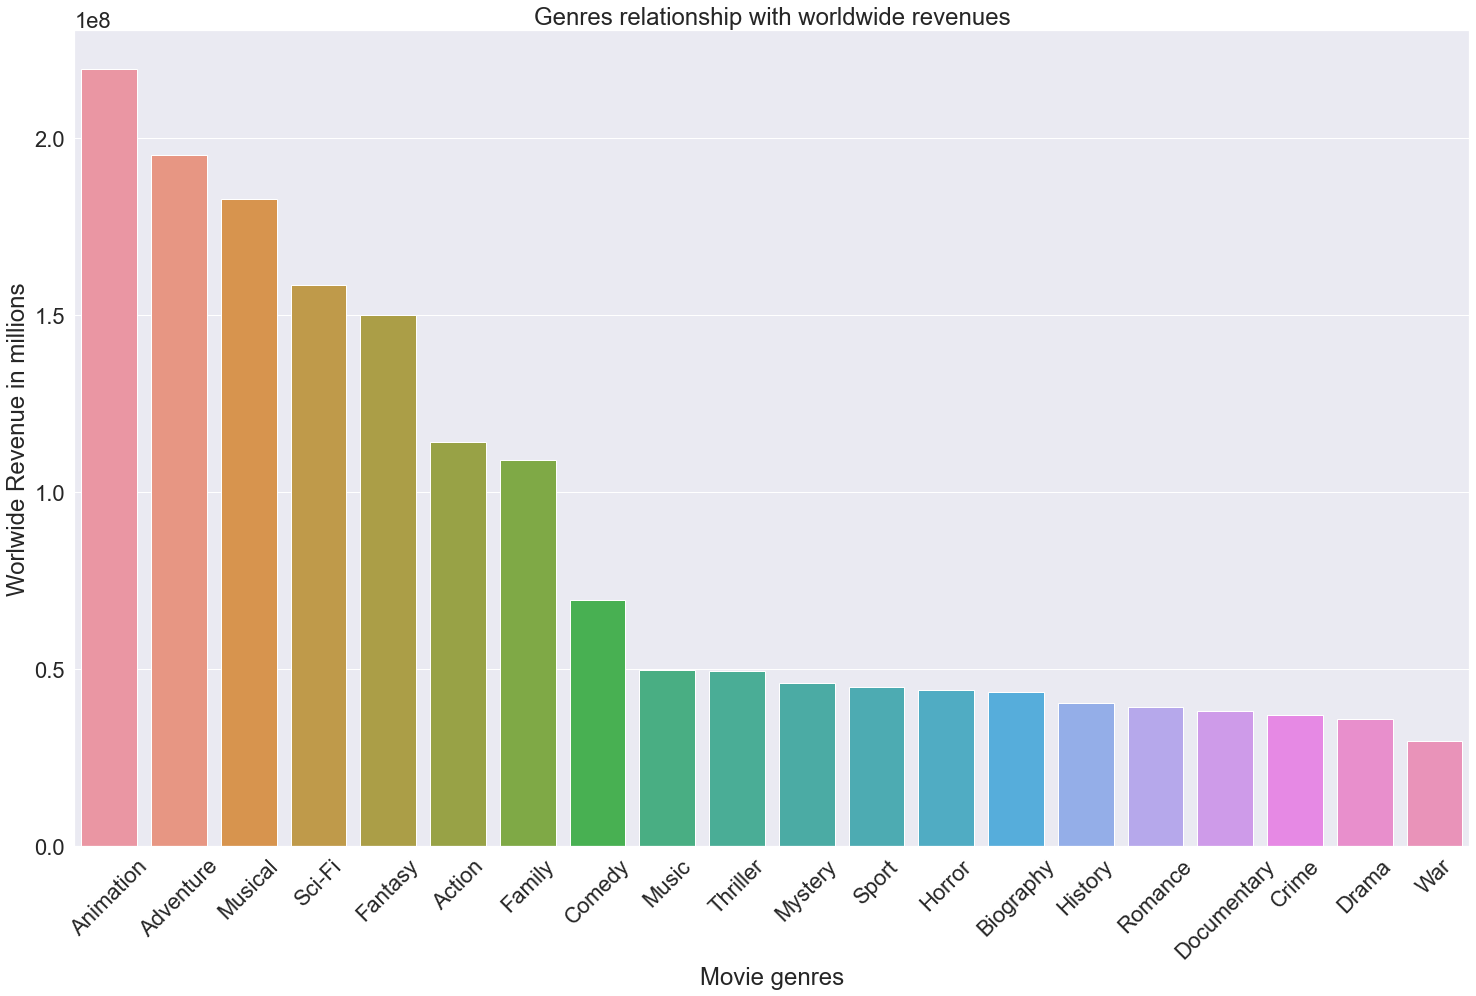

In [183]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 15)

sns.set(font_scale = 2)


a=sns.barplot(x = 'genres', y = 'worldwide_revenue' , data = first_20_genres_worldwide, ax=ax )
ax.set_title('Genres relationship with worldwide revenues')
ax.set_xlabel('Movie genres')
ax.set_ylabel('Worlwide Revenue in millions')
a.set_xticklabels(a.get_xticklabels(), rotation=45)

plt.show()

In [184]:
df2=merged_tn_basics_1_notnull.groupby(['genres'],as_index=False).mean().sort_values(by = 'domestic_revenue',ascending =False)
first_20_genres_domestic = df2.iloc[:20,:]
first_20_genres_domestic.style.format({'worldwide_revenue' : '{:,.0f}', 'domestic_revenue' : '{:,.0f}'})

,genres,worldwide_revenue,domestic_revenue
13,Musical,"182,732,306","60,268,877"
2,Animation,"219,399,378","31,231,562"
8,Family,"108,895,300","19,556,889"
18,Sci-Fi,"158,386,000","19,244,804"
9,Fantasy,"149,960,913","15,104,169"
12,Music,"49,540,757","14,755,591"
1,Adventure,"195,089,851","14,414,755"
4,Comedy,"69,276,468","13,465,594"
19,Sport,"44,884,715","10,868,957"
11,Horror,"44,112,362","9,316,965"


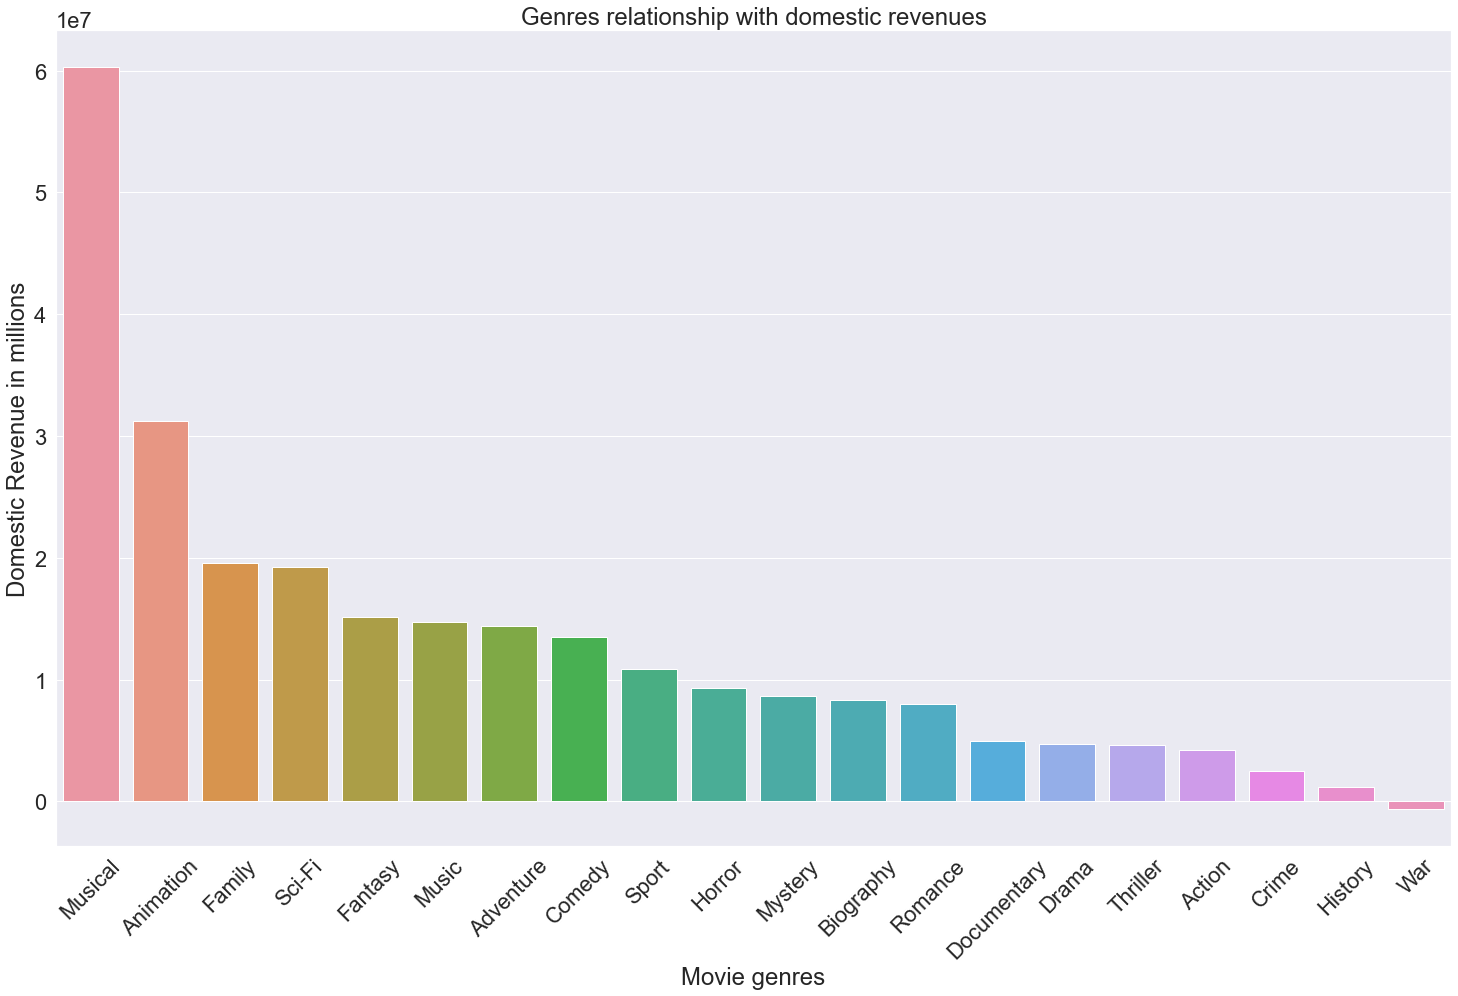

In [185]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 15)

sns.set(font_scale = 2)


a=sns.barplot(x = 'genres', y = 'domestic_revenue' , data = first_20_genres_domestic, ax=ax )
ax.set_title('Genres relationship with domestic revenues')
ax.set_xlabel('Movie genres')
ax.set_ylabel('Domestic Revenue in millions')
a.set_xticklabels(a.get_xticklabels(), rotation=45)

plt.show()

In [186]:
df3=merged_tn_basics_1_notnull.groupby(['movie'],as_index=False).mean().sort_values(by = 'worldwide_revenue', ascending = False).head(20)


first_20_movies_worldwide = df3.iloc[:20,:]
first_20_movies_worldwide.style.format({'worldwide_revenue' : '{:,.0f}', 'domestic_revenue' : '{:,.0f}'})

,movie,worldwide_revenue,domestic_revenue
176,Avatar,"2,351,345,279","335,507,625"
2104,Titanic,"2,008,208,395","459,363,944"
178,Avengers: Infinity War,"1,748,134,200","378,815,482"
930,Jurassic World,"1,433,854,864","437,270,625"
673,Furious 7,"1,328,722,794","163,007,020"
258,Black Panther,"1,148,258,224","500,059,566"
931,Jurassic World: Fallen Kingdom,"1,135,772,799","247,719,760"
668,Frozen,"1,122,469,910","250,738,009"
1110,Minions,"1,086,336,173","262,045,770"
177,Avengers: Age of Ultron,"1,072,413,963","128,405,868"


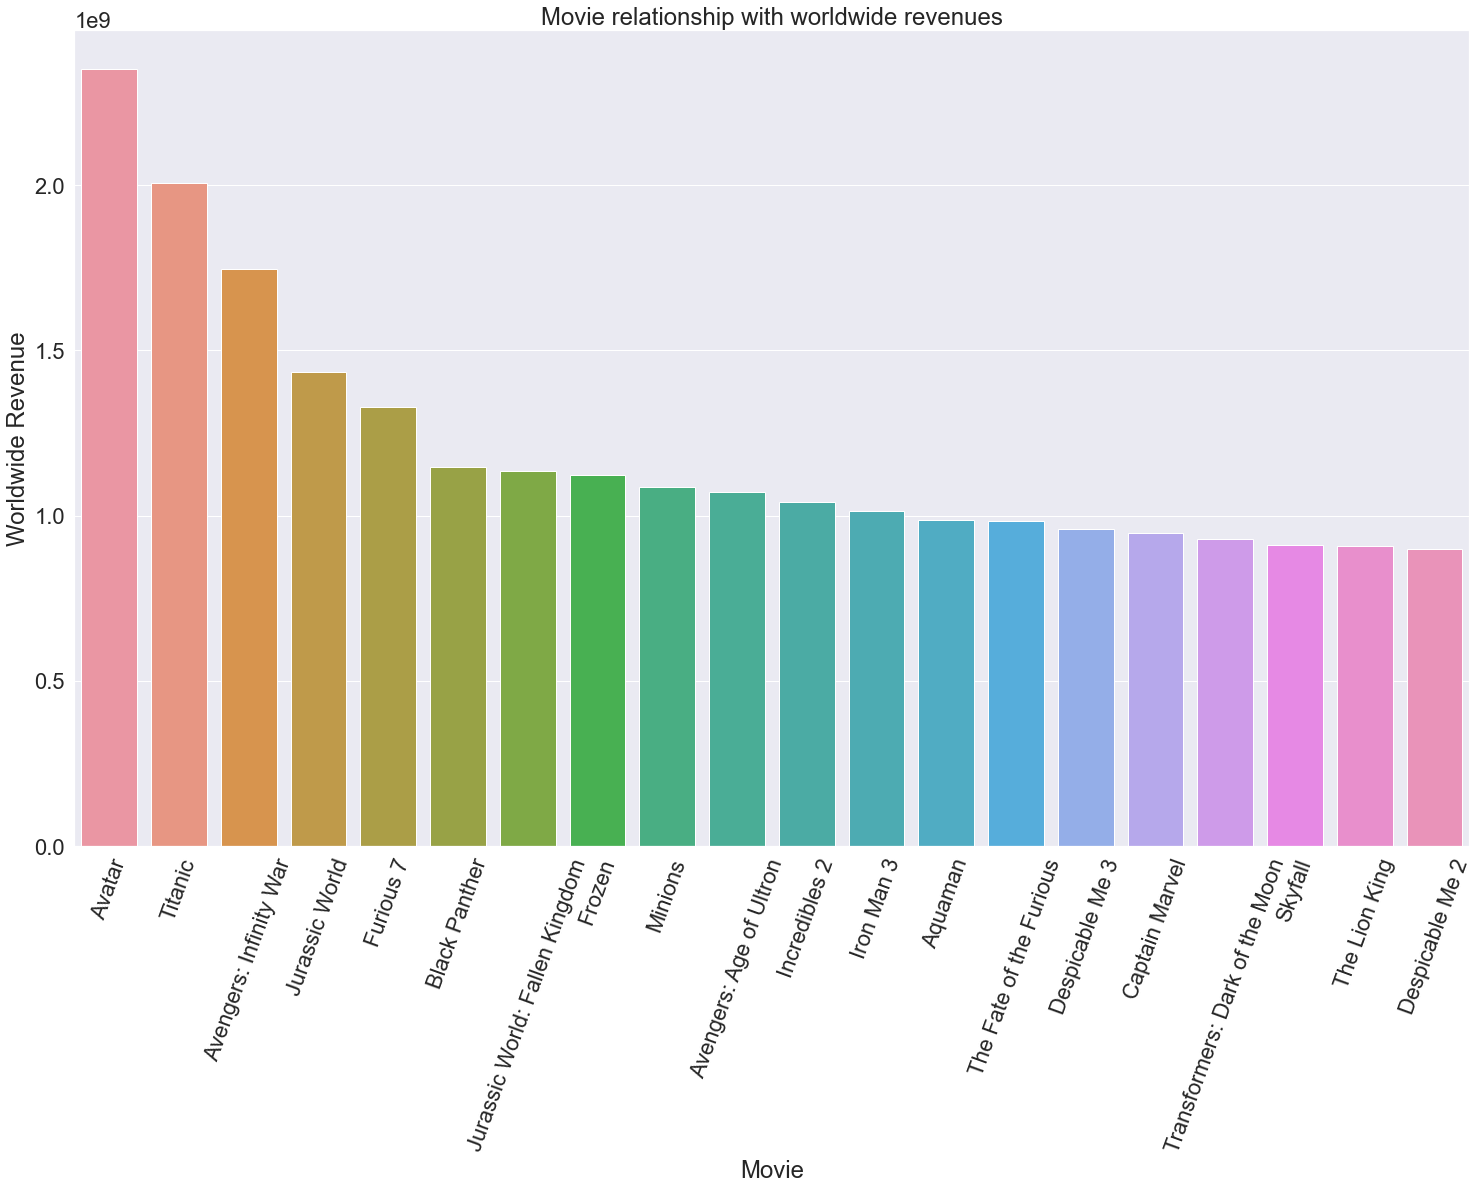

In [187]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 15)

sns.set(font_scale = 2)


a=sns.barplot(x = 'movie', y = 'worldwide_revenue' , data = first_20_movies_worldwide, ax=ax )
ax.set_title('Movie relationship with worldwide revenues')
ax.set_xlabel('Movie')
ax.set_ylabel('Worldwide Revenue')
a.set_xticklabels(a.get_xticklabels(), rotation=70)

plt.show()

In [188]:
df4=merged_tn_basics_1_notnull.groupby(['movie'],as_index=False).mean().sort_values(by = 'domestic_revenue', ascending = False).head(20)

first_20_movies_domestic = df4.iloc[:20,:]
first_20_movies_domestic.style.format({'worldwide_revenue' : '{:,.0f}', 'domestic_revenue' : '{:,.0f}'})

,movie,worldwide_revenue,domestic_revenue
258,Black Panther,"1,148,258,224","500,059,566"
2104,Titanic,"2,008,208,395","459,363,944"
930,Jurassic World,"1,433,854,864","437,270,625"
862,Incredibles 2,"1,042,520,711","408,581,744"
178,Avengers: Infinity War,"1,748,134,200","378,815,482"
215,Beauty and the Beast,"843,815,419","350,035,716"
1885,The Lion King,"906,914,868","342,485,283"
176,Avatar,"2,351,345,279","335,507,625"
1399,Rogue One: A Star Wars Story,"849,102,856","332,177,324"
1827,The Hunger Games,"597,923,379","328,010,692"


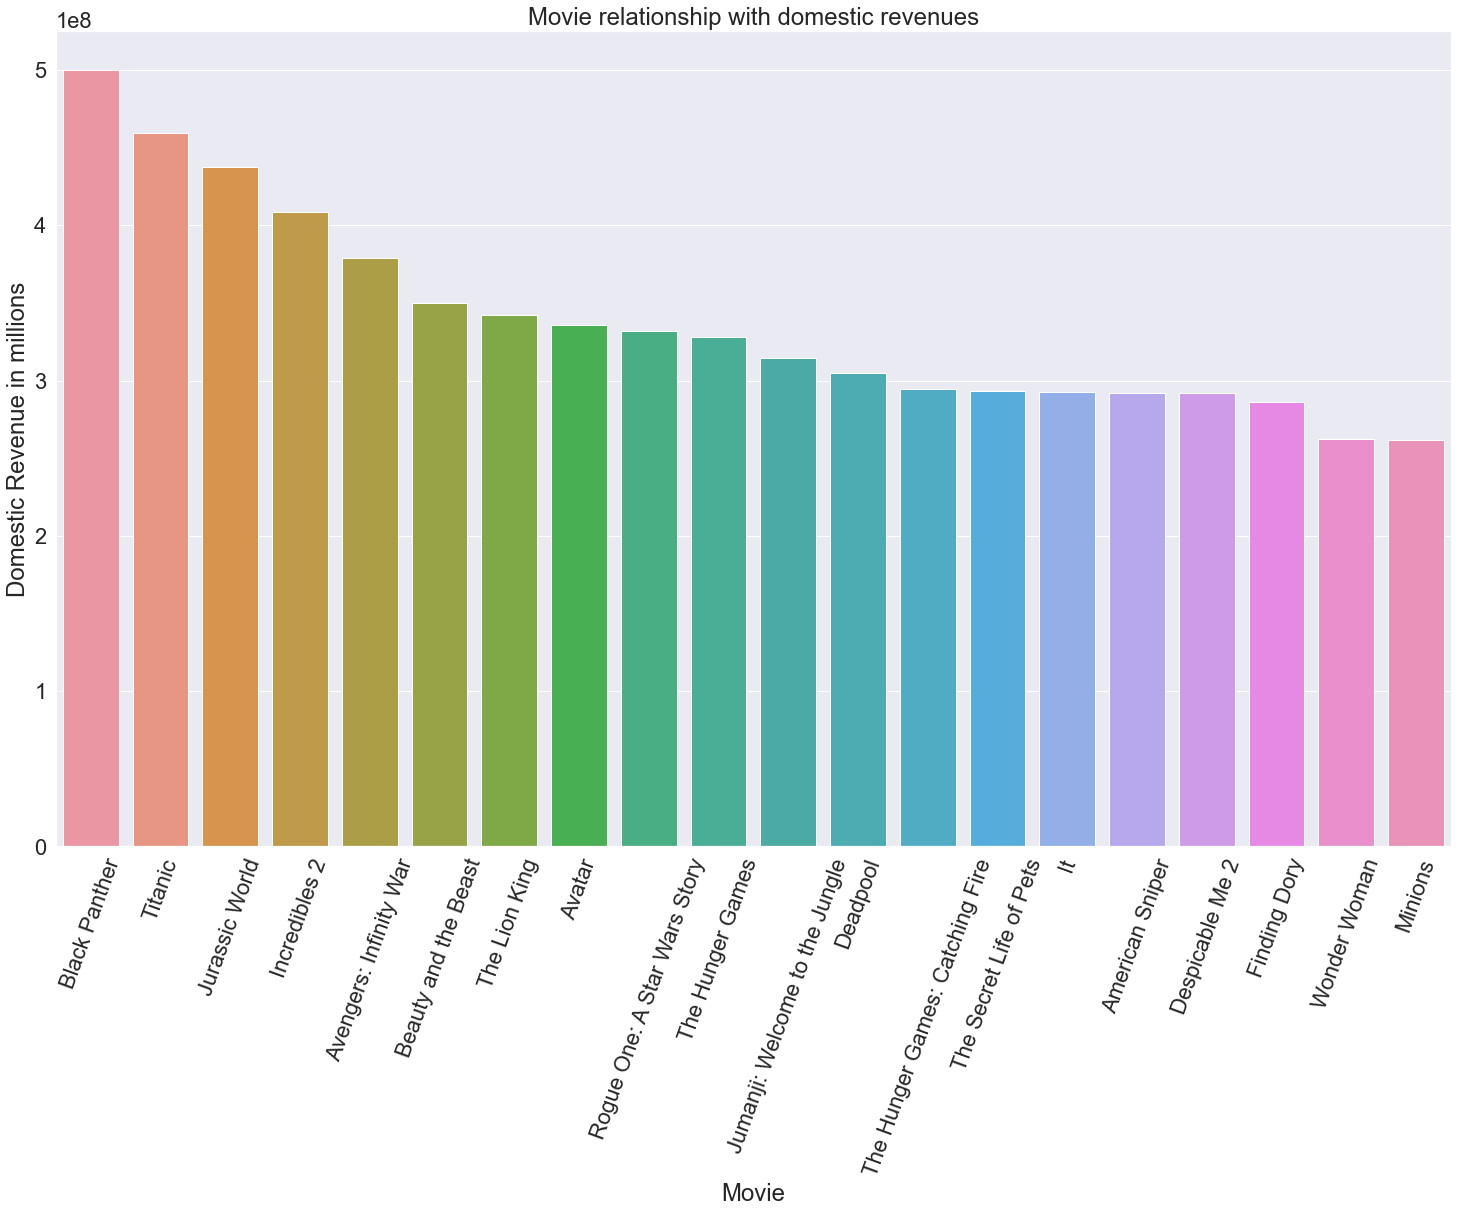

In [189]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 15)

sns.set(font_scale = 2)


a=sns.barplot(x = 'movie', y = 'domestic_revenue' , data = first_20_movies_domestic, ax=ax )
ax.set_title('Movie relationship with domestic revenues')
ax.set_xlabel('Movie')
ax.set_ylabel('Domestic Revenue in millions')
a.set_xticklabels(a.get_xticklabels(), rotation=70)

plt.show()

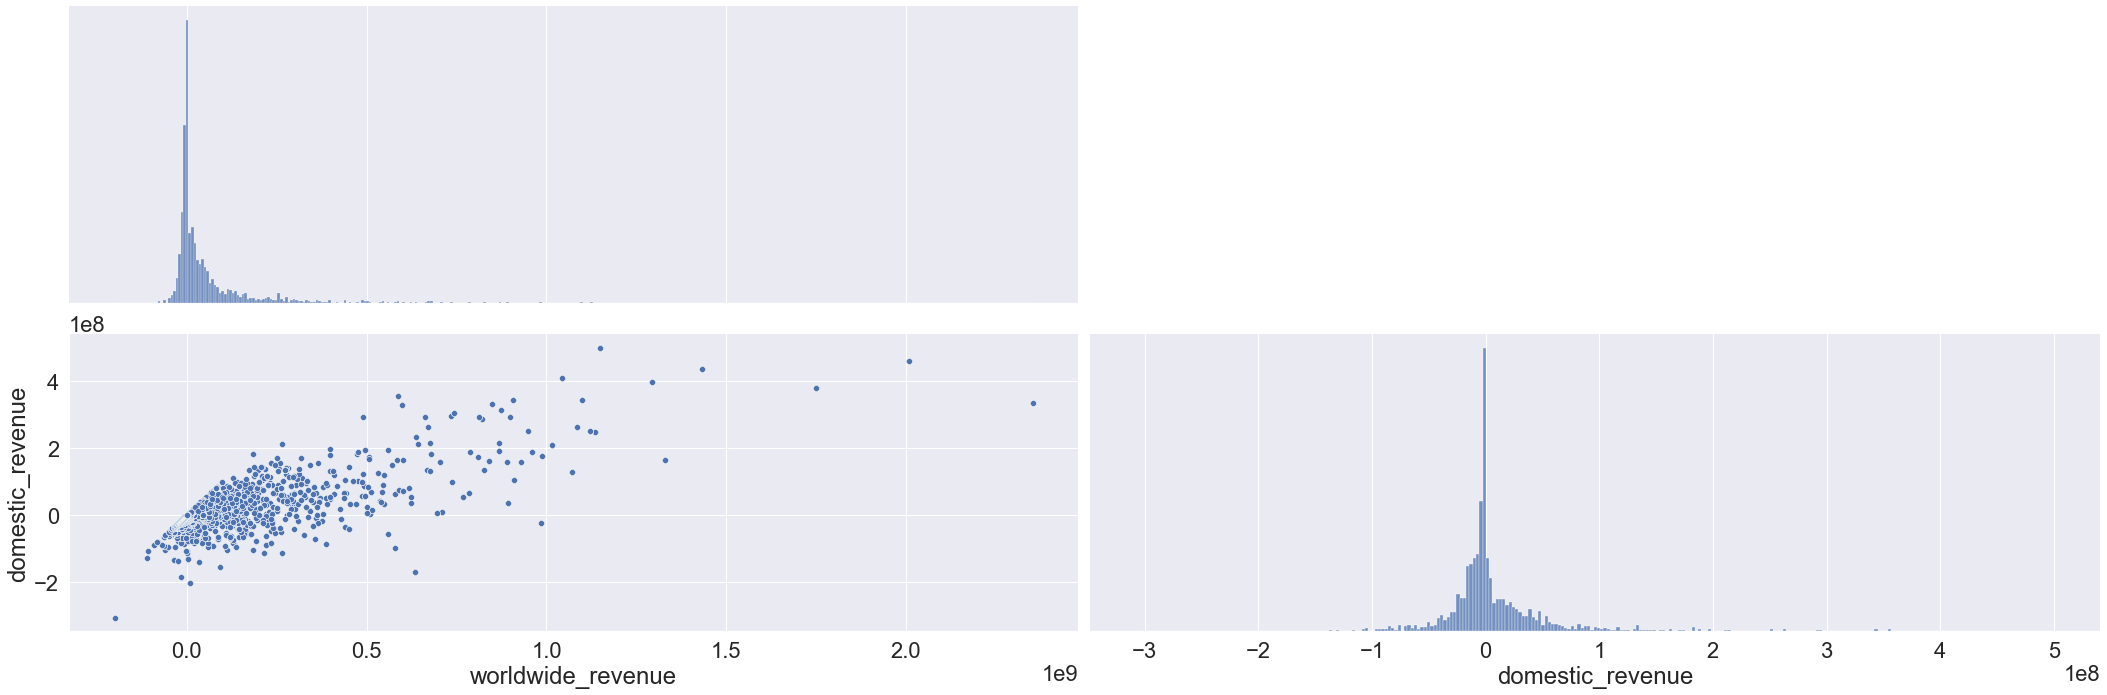

In [190]:
sns.pairplot(merged_tn_basics_1_notnull, corner = True, height =5, aspect=3)
plt.show()